In [70]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     # RIP Training time
#     raise SystemError('GPU device not found')
#     print('Found GPU at: {}'.format(device_name))

In [4]:
TRAIN_DATA_ZIP_PATH = "vn_handwritten_images.zip"

In [5]:
import zipfile
with zipfile.ZipFile(TRAIN_DATA_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall("vietnamese_hcr/raw")

In [16]:
import pathlib

current_path = pathlib.Path('./vietnamese_hcr/').absolute()

current_path

WindowsPath('d:/code-ml/DATN_Vietnamese_OCR/vietnamese_hcr')

In [17]:
import os

DATA_PATH = os.path.join(str(current_path), "data")
TEST_FOLDER = os.path.join(DATA_PATH, "test")
TRAIN_FOLDER = os.path.join(DATA_PATH, "train")

# our raw folders
RAW_FOLDER = os.path.join(str(current_path),"raw")

# label json files
TRAIN_JSON = os.path.join(RAW_FOLDER, "labels.json")

In [8]:
RAW_FOLDER

'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw'

In [9]:
TRAIN_JSON

'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\labels.json'

In [3]:
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
if not os.path.exists(TEST_FOLDER):
    os.makedirs(TEST_FOLDER)
if not os.path.exists(TRAIN_FOLDER):
    os.makedirs(TRAIN_FOLDER)

NameError: name 'os' is not defined

In [18]:
import json
# open these label jsons files
with open(TRAIN_JSON, 'r', encoding='utf8') as file:
    train_labels = json.load(file)

In [19]:
train_labels

{'1.jpg': 'Số 3 Nguyễn Ngọc Vũ, Hà Nội',
 '2.jpg': 'Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội',
 '3.jpg': '58 Thái Thịnh, Đống Đa, Hà Nội',
 '4.jpeg': 'Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai',
 '5.jpg': 'Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung',
 '6.jpg': 'Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội',
 '7.jpg': '40 Cát Linh, Đống Đa, Hà Nội',
 '8.jpg': 'phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm',
 '9.JPG': 'Nhà 87 ngõ 416 Đê La Thành',
 '10.JPG': 'Up coworking Space, 89 Láng Hạ, Hà Nội',
 '11.jpg': '192 Ngô Đức Kế, quận 1, Hồ Chí Minh',
 '12.jpg': 'số 5 Công Trường Mê Linh, phường Bến Nghé, quận 1',
 '13.jpg': '90A đường Mai Xuân Thưởng, tỉnh Gia Lai',
 '14.jpg': '96/7/12B Phạm Văn Đồng, thành phố Pleiku',
 '15.jpg': '168 Ngô Gia Tự, thành phố Hà Tĩnh',
 '0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '

In [20]:
# find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list= set()
for label in train_labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)

In [21]:
print(f'There are {len(char_list)} unique characters in this dataset.')

# show all possible labels characters
print("".join(char_list))


There are 140 unique characters in this dataset.
 #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Danh sách các ký tự
character_list = "".join(char_list)
# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(character_list)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [23]:
# convert the words to array of indexs based on the char_list
def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list :", char)
        
    return dig_lst

In [24]:
# example
test = encode_to_labels("đồ án tốt nghiệp 2023")
print(test)

[91, 119, 0, 74, 57, 0, 63, 118, 63, 0, 57, 51, 52, 53, 113, 59, 0, 12, 10, 12, 13]


In [25]:
# find all image paths for train folder 1 and 2 and test folder
train_image_path = []

for item in pathlib.Path(RAW_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))

In [26]:
train_image_path[:20]

['d:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0000_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0001_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0002_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0003_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0004_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0005_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0006_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0007_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0008_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0009_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0010_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0011_samples.png',
 'd:\\code-ml\\D

Preprocessing

- Find all widths and heights of images
- Use openCV to read image
- Preprocess images (like converting images to greyscale)
- Resize images so all images will have the same size
- Split your dataset into trainset and testset
- Build CRNN model with CTC loss
- Prediction
- Calculate metrics for SER, WER and CER

In [27]:
# Matching full absoluate paths and labels instead of filenames and labels 
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(RAW_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      label = train_labels[file_name]
      dict_filepath_label[str(item)]=label

In [28]:
dict_filepath_label

{'d:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0002_samples.png': 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0003_samples.png': '42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0004_samples.png': '200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0005_samples.png': '27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0006_samples.png': 'Số 113 Đường Hưng Thái 

In [29]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

print(f'max label length: {max_label_len}')

max label length: 69


In [30]:
all_image_paths = list(dict_filepath_label.keys())

all_image_paths[:10]

['d:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0000_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0001_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0002_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0003_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0004_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0005_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0006_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0007_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0008_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0009_samples.png']

In [31]:
import cv2

widths = []
heights = []
for img_path in all_image_paths:
    img = cv2.imread(img_path)
    (h, w, _) = img.shape
    heights.append(h)
    widths.append(w)

In [32]:
len(heights)

1838

In [33]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

# this information is useful for making decision for padding and resizing
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)

In [34]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=TEST_SIZE, random_state=42)

In [35]:
# Constants (we choose this number as we later discover that the output of our CNN is (1,9,512) from out input)
TIME_STEPS = 240

BUILD THE PIPELINE FOR THE IMAGES, definitely this is super basic pipeline

In [36]:
import numpy as np

# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []

RESIZE_MAX_WIDTH = 0

i = 0 

for train_img_path in train_image_paths:
    # read img and convert into gray img
    img = cv2.imread(train_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = img.shape

    img = cv2.resize(img, (int(118 / h * w), 118))

    h, w = img.shape

    if img.shape[1] > RESIZE_MAX_WIDTH:
        RESIZE_MAX_WIDTH = img.shape[1]

    img = np.pad(img, ((0, 0), (0, 2167 - w)), 'median')

    # BLur img
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # threshold the img using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # add channel dimension
    img = np.expand_dims(img, axis = 2)

    # normalize each img
    img = img / 255.0

    label = dict_filepath_label[train_img_path]

    orig_txt.append(label)
    train_label_length.append(len(label))

    # our time steps for valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # convert words to digits based on charlist
    training_txt.append(encode_to_labels(label))
    i = i + 1
    if i % 500 == 0:
        print(f"has processed trained {i} files")

print(RESIZE_MAX_WIDTH)



has processed trained 500 files
has processed trained 1000 files
2167


In [37]:
print(len(training_img))

1470


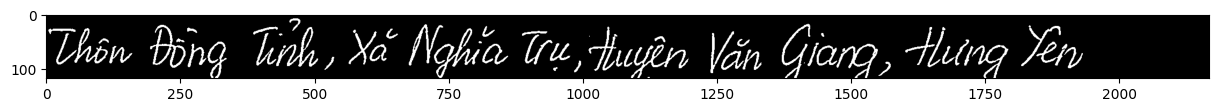

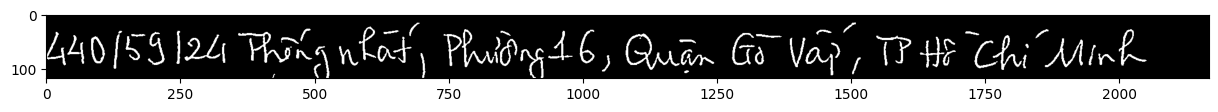

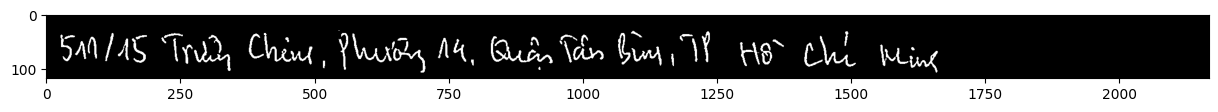

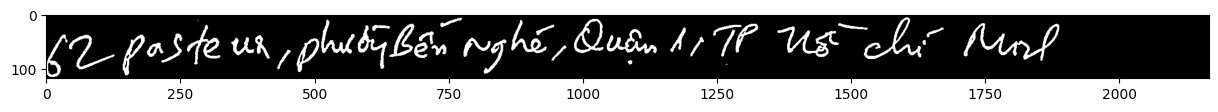

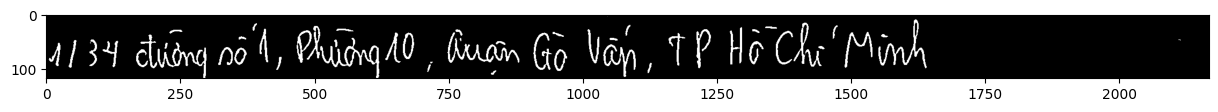

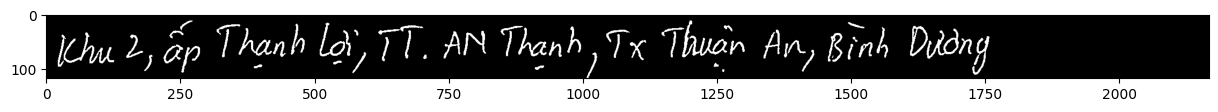

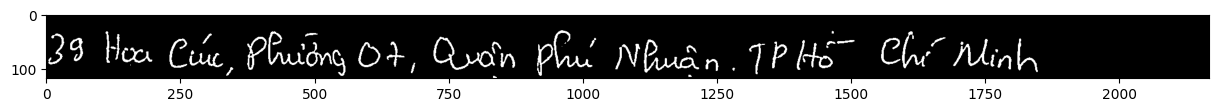

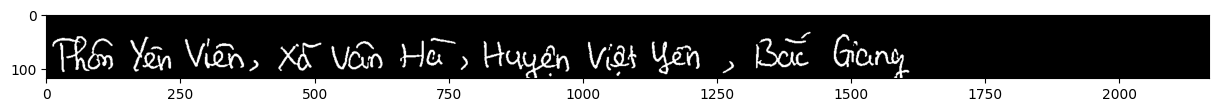

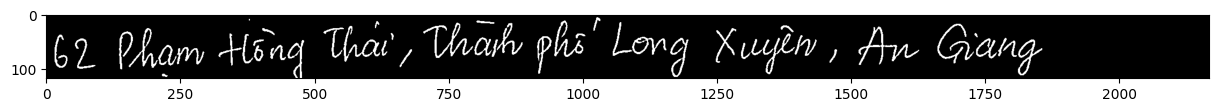

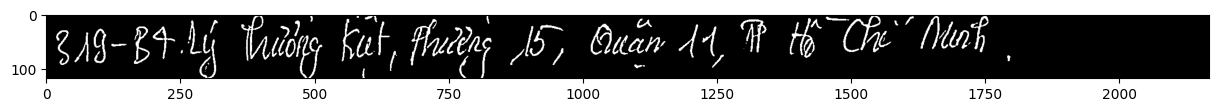

In [38]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize = (15, 2))
    plt.imshow(training_img[i][:, :, 0], cmap = "gray")
    plt.show()

In [39]:

#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i = 0

for val_img_path in val_image_paths:

    img = cv2.imread(val_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    h, w = img.shape

    img = cv2.resize(img,(int(118/h * w), 118))
    
    h, w = img.shape

    if img.shape[1] > RESIZE_MAX_WIDTH:
        RESIZE_MAX_WIDTH = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 2167 - w)), 'median')
    
    # YOUR PART: Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # YOUR PART: Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    # our time steps for valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # convert words to digits based on charlist
    valid_txt.append(encode_to_labels(label))
    i = i + 1
    if i % 500 == 0:
        print (f"has processed test {i} files")
print(RESIZE_MAX_WIDTH)

2167


In [40]:
max_label_len = TIME_STEPS

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad each output label to maximum text length, remember we did that so that we keep training with rnn consistent?
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [42]:
train_padded_txt[0]

array([ 40,  52,  84,  57,   0,  90, 119,  57,  51,   0,  40, 114,  57,
        52,   6,   0,  44,  76,   0,  34,  51,  52,  92,  46,   0,  40,
        61, 128,   6,   0,  28,  64,  68, 113,  57,   0,  42,  89,  57,
         0,  27,  53,  46,  57,  51,   6,   0,  28,  96,  57,  51,   0,
        45,  79,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Model Building

In [43]:
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [44]:
inputs = Input(shape = (118, 2167, 1))

# Block 1
X = Conv2D(64, (3, 3), padding = 'same')(inputs)
X = MaxPool2D(pool_size = 3, strides = 3)(X)
X = Activation('relu')(X)
conv_1 = X

# Block 2
X = Conv2D(128, (3, 3), padding = 'same')(X)
X = MaxPool2D(pool_size = 3, strides = 3)(X)
X = Activation('relu')(X)
conv_2 = X

# Block 3
X = Conv2D(256, (3, 3), padding = 'same')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
conv_3 = X

# Block 4
X = Conv2D(256, (3, 3), padding = 'same')(X)
X = BatchNormalization()(X)
X = Add()([X, conv_3])
X = Activation('relu')(X)
conv_4 = X

# Block 5
X = Conv2D(512, (3, 3), padding = 'same')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
conv_5 = X

# Block 6
X = Conv2D(512, (3, 3), padding = 'same')(X)
X = BatchNormalization()(X)
X = Add()([X, conv_5])
X = Activation('relu')(X)
conv_6 = X

# Block 7
X = Conv2D(1024, (3, 3), padding = 'same')(X)
X = BatchNormalization()(X)
X = MaxPool2D(pool_size = (3, 1))(X)
X = Activation('relu')(X)


# pooling layer with kernel size (2,2) to make the height/2 #(1,9,512)
X = MaxPool2D(pool_size = (3, 1))(X)

# to remove the first dim of one: (1, 31, 512) to (31, 512)
squeezed = Lambda(lambda X: K.squeeze(X, 1))(X)

# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(char_list) + 1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [45]:
act_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 118, 2167,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 118, 2167, 6  640         ['input_1[0][0]']                
                                4)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 39, 722, 64)  0           ['conv2d[0][0]']                 
                                                                                              

In [46]:
### ctc definition part 
"""
The reason why we use ctc_batch_cost instead of ctc_cost because
In batch cost, the program managed to mask out padded sequence using label_length, 
So the cost won't include the padding 0 section.
"""

"""
The way CTC is modelled currently in Keras is that you need to implement the loss function as a layer, you did that already (loss_out). 
Your problem is that the inputs you give that layer are not tensors from Theano/TensorFlow but numpy arrays.
To change that one option is to model these values as inputs to your model.
That is why we need to manually create Input for labels, input length and label_length.
"""
# define the label input shape for ctc
labels = Input(name = 'the_labels', shape = [max_label_len], dtype = 'float32')

"""
where input_length and label_length are constants you created previously
the easiest way here is to have a fixed batch size in training 
the lengths should have the same batch size (see shapes in the link for ctc_cost)   
"""

# define the length of input and label for ctc
input_length = Input(name = 'input_length', shape = [1], dtype = 'int64')
label_length = Input(name = 'label_length', shape = [1], dtype = 'int64')

# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

# out loss func 
loss_out = Lambda(ctc_lambda_func, output_shape = (1, ), name = 'ctc')([outputs, labels, input_length, label_length])

# model to be used at training time

model = Model(inputs = [inputs, labels, input_length, label_length], outputs = loss_out)

In [49]:
# ready ctc loss func and optimizers

model.compile(loss = {'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath=os.path.join('checkpoint_weights.hdf5'),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [47]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 118, 2167,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 118, 2167, 6  640         ['input_1[0][0]']                
                                4)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 39, 722, 64)  0           ['conv2d[0][0]']                 
                                                                                            

In [48]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)

In [91]:
# choose batchsize and epochs

batch_size = 32
epochs = 100

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y = np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)

Epoch 1/100
18/46 [==========>...................] - ETA: 29:46 - loss: 328.5398

In [50]:
# load the saved best model weights
act_model.load_weights(os.path.join('./models/model_checkpoint_weights.hdf5'))

In [51]:
act_model.save(os.path.join('./models/model.h5'))

In [52]:
# predict outputs on validation images
NO_PREDICTS = 100
OFFSET=0
# prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img)

12/12 [==============================] - 146s 12s/step


In [54]:
prediction.shape

(368, 240, 141)

In [55]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

original_text  =  286 Phạm Hùng, Xã Hoà Phước, Huyện Hoà Vang, Đà Nẵng
predicted text = 286 Phạm Hùng, Xã Hòa Phước, Huyện Hoà Vang, Đà Nẵng
original_text  =  xã Quách Phẩm Bắc, Xã Quách Phẩm Bắc, Huyện Đầm Dơi, Cà Mau
predicted text = xã Quách Phẩm Bắc, Xã Quách Phẩm Bắc, Huyện Đầm Dơi, Cà Mau
original_text  =  182 Phan Văn Hân P.17, Phường 17, Quận Bình Thạnh, TP Hồ Chí Minh
predicted text = 182 Phan Văn Hân P.17, Phường 17, Quận Bình Thạnh, TP Hồ Chí Minh
original_text  =  TK 3, Thị trấn Hoàn Lão, Huyện Bố Trạch, Quảng Bình
predicted text = TK 3, Thị trấn Hoàn Lão, Huyện Bố Trạch, Quảng Bình
original_text  =  Phòng 2 nhà D TT nhà máy Thăng long, Quận Thanh Xuân, Hà Nội
predicted text = Phòng 2 nhà D TT nhà máy Thăng long, Quận Thanh Xuân, Hà Nội
original_text  =  Lô C1, KCN Quang Châu, Xã Quang Châu, Huyện Việt Yên, Bắc Giang
predicted text = Lô C1, KCN Quang Châu, Xã Quang Châu, Huyện Việt Yên, Bắc Giang
original_text  =  Tầng 8, 57-59 Hồ Tùng Mậu, Phường Bến Nghé, Quận 1, TP Hồ Ch

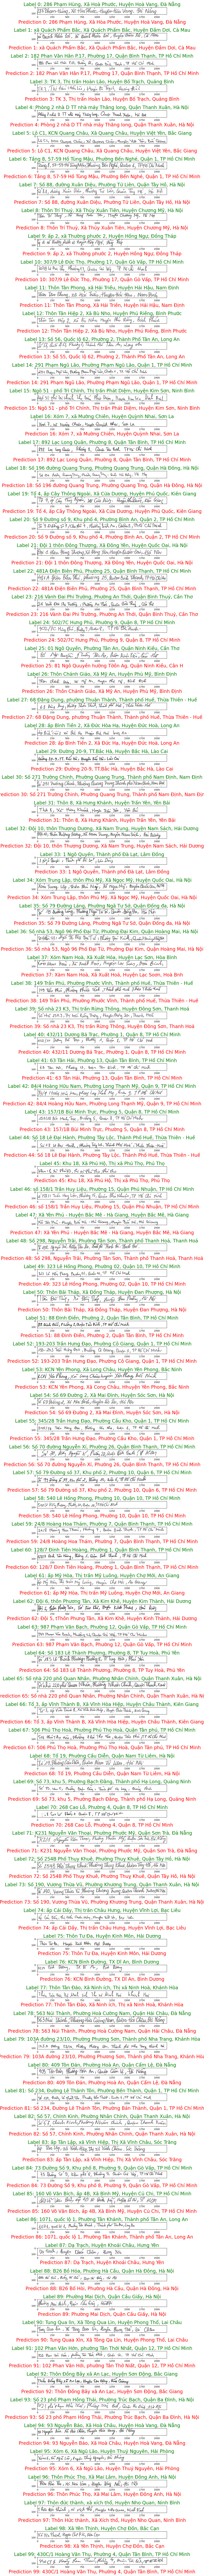

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,200))
col=0
row=1
gs1 = gridspec.GridSpec(NO_PREDICTS, 1)
# gs1.update(wspace=0.025, hspace=0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0], cmap="gray_r")
    plt.title(f"Label {n}: "+valid_orig_txt[n+OFFSET], fontsize=20, color="green")
    plt.xlabel(f"Prediction {n}: "+all_predictions[n+OFFSET], fontsize=20, color="red")

In [57]:
def plot_metrics(cer_values, wer_values, ser_values):
    x = ['CER', 'WER', 'SER']
    y = [cer_values, wer_values, ser_values]

    plt.bar(x, y)
    plt.xlabel('Metrics')
    plt.ylabel('Error Rate')
    plt.title('OCR Metrics')

    plt.show()

In [58]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [59]:
evaluate = ocr_metrics(predicts=all_predictions,
                                  ground_truth=valid_orig_txt,
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2]),
])

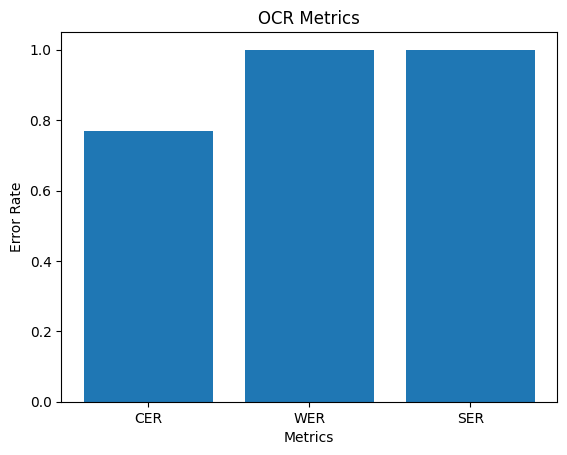

In [60]:
predicts = ['prediction1', 'prediction2', 'prediction3']
ground_truth = ['ground_truth1', 'ground_truth2', 'ground_truth3']

cer, wer, ser = ocr_metrics(predicts, ground_truth)

plot_metrics(cer, wer, ser)

In [61]:
print(e_corpus)

Metrics:
Character Error Rate: 0.007392301845229682
Word Error Rate:      0.026915996141539607
Sequence Error Rate:  0.14130434782608695


In [51]:
%load_ext tensorboard

In [52]:
%tensorboard --logdir logs